
<font color=blue>
    _Objetivo del curso_: Aprender las diferentes fases del Aprendizaje de Datos (ML) a traves de  ejemplos reales. Esto con el fin de obtener una idea clara de lo que significa la ciencia de datos.
</font>

La mejor manera de entender los procesos involucrados en la ciencia de datos, es a traves de ejemplos realistas (concretos).


Estaremos trabajando sobre _notebook_ de __jupyter__: Usaremos **Python** en cada nivel de la tubería 

La librerias principales de Python involucradas en este curso son 

* <b>Pandas</b> para la manipulación e ingesta de los datos
* <b>Matplotlib</b> and <b> seaborn</b> para la vizualización de los datos
* <b>Numpy</b> para computo de arreglos multidimensionales
* <b>sklearn</b> para el aprendizaje de máquinas y el modelado predectivo

### Proceso de Instalación 

Una manera sencilla de installar esta paqueteria es descargar e instalar 
la distribucion <a href="http://conda.pydata.org/docs/install/quick.html#os-x-miniconda-install">Conda</a> que encapsula a todas las librerias mencionadas. Esta distribución esta disponible en todas las plataformas (Windows, Linux and Mac OSX).

### Nota 

...

### El conjunto de datos (Wisconsin) del Cáncer de mama

Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen. El espacio tridimensional es el descrito en: [K. P. Bennett y O. L. Mangasarian: "Discriminación robusta de la programación lineal de dos conjuntos linealmente inseparables", Métodos de optimización y software 1, 1992, 23-34].

Del artículo mencionado, leemos que:

"Cada registro representa información de seguimiento para un caso cáncer de mama. 
Estos  pacientes han sido atentidos por el Dr. Wolberg desde el año 1984,
están incluídos sólo aquellos casos que exhiben cáncer de mama y donde no hay evidencia de metástasis 
a distancia en el tiempo de diagnóstico."


### Imagen típica

![](images/fna-cell.png)

<h5 align="center">Imagen ampliada de un seno maligno obtenida con la biopsia FNA (Fine Needle Aspiration). Los núcleos de células visibles se han esbozado con la ayuda de un programa de ajuste de curvas. El sistema también calcula varias características para cada núcleo y diagnostica con precisión la muestra. El proceso de diagnóstico interactivo toma alrededor de 5 minutos por muestra.</h5> 

FUENTE: K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34

Los datos se encuentran en el repositorio de aprendizaje automático de UCI: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
***

<h2 align="center">El flujo de trabajo en un proyecto de ciencia de datos </h2>

El conjunto de  lineamientos específicos ('ducto') en un proyecto de  ciencia de datos varía dependiendo de la naturaleza del mismo. Aquí presentamos un ducto estandar:


### Analisis exploratorio de los datos

 - Extracción: Cargar el conjunto de datos y echarles una mirada
 - Limpieza: Encontrar los valores que faltan
 - Visualización: Crear algunas gráficas interesantes que nos permitan idendificar correlaciones y 
 - Suposiciones: Formular hipótesis sobre los gráficos
 

### Ingeniería de Características

 - Datos Categóricos
 - Extraer
 - Procesar
 
### Modelado de datos
 - Selección de Características.  Reducir el número de caracterísiticas trae los siguientes beneficios:
     - Reduce el número de redundancias en los datos
     - Acelera los procesos de entrenamiento 
     - Reduce el 'overfitting'
     - Muestreo de modelos base
 - Muestreo de los modelos base   
 ***

_Ajustamos un poco el estilo de este libro trabajo para tener graficas centradas_ 

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");


## Análisis exploratorio de los datos

  **Extracción** 
  
  Obtenemos los datos directamente del URL oficial del repositorio de datos. Para ello importamos la librería _wget_

In [3]:
import wget

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'  
local_path = './data/wisconsin.csv'

#descargamos la informacion de url y la guardamos en local_path
wget.download(url, local_path) 

'./data/wisconsin.csv'

En el sitio del repositorio podemos encontrar un
<a href="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names"> archivo </a> con las caracterisiticas de la  información

Más espeficamente el punto siete nos describe los atributos de los datos. Los primeros dos atributos (o caracteristicas) son:

    1) ID 
    2) Diagnosis (M = Maligno, B = Benigno)

Se calculan diez características de valor real para cada núcleo celular:

    a) radio (media de las distancias desde el centro a los puntos en el perímetro)
    b) textura (desviación estándar de los valores de escala de grises)
    c) perímetro
    d) área
    e) suavidad (variación local en longitudes de radio)
    f) compacidad (perímetro ^ 2 / área - 1.0)
    g) concavidad (severidad de las porciones cóncavas del contorno)
    h) puntos cóncavos (número de porciones cóncavas del contorno)
    i) simetria
    j) dimensión fractal ("aproximación de la línea de costa" - 1)

    La media, el error estándar y el "peor" o mayor (media de las tres
    los valores más grandes) de estas características se calcularon para cada imagen,
    dando como resultado 30 características. Por ejemplo, el campo 3 es Radio medio, campo
    13 es el radio SE, el campo 23 es el peor radio.
    
    Todos los valores de las funciones se registran con cuatro dígitos significativos.

### Características de los datos 
***
Los datos del archivo que descargamos, no poseen las correspondientes etiquetas (_a) radio, b) textura,..._). Tenemos 30  mediciones, el ID y el diagnostico. Entonces tenemos un número total de 32 atributos.  Las siguientes instrucciónes nos crea un arreglo de caracteristicas.  

In [4]:
features =  ['a:radio','b:textura','c:perimetro', \
             'd:area', 'e:suavidad','f:compactes', \
             'g:concavidad', 'h:puntos_concavos','i:simetria',\
             'j:dimension_fractal']

columns_all = ['ID', 'Diagnostico'] + \
              list(map(lambda x: x[2:] + '_promedio', features)) + \
              list(map(lambda x: x[2:] + '_error', features)) +  \
              list(map(lambda x: x[2:] + '_peor', features))

El manejo de los datos estará a cargo de la libreria **Pandas** 

Cargamos el conjunto de datos:

In [5]:
import pandas as pd

data = pd.read_csv('./data/wisconsin.csv', names = columns_all);
data = data.reset_index().drop(columns =['index'])

Echamos un vistazo a los datos. Listamos un numero aleatorio de 5 registros:

In [6]:
data.sample(5)

,ID,Diagnostico,radio_promedio,textura_promedio,perimetro_promedio,area_promedio,suavidad_promedio,compactes_promedio,concavidad_promedio,puntos_concavos_promedio,...,radio_peor,textura_peor,perimetro_peor,area_peor,suavidad_peor,compactes_peor,concavidad_peor,puntos_concavos_peor,simetria_peor,dimension_fractal_peor
336,897604,B,12.99,14.23,84.08,514.3,0.09462,0.09965,0.037380,0.020980,...,13.72,16.91,87.38,576.0,0.1142,0.19750,0.145000,0.05850,0.2432,0.10090
230,881972,M,17.05,19.08,113.40,895.0,0.11410,0.15720,0.191000,0.109000,...,19.59,24.89,133.50,1189.0,0.1703,0.39340,0.501800,0.25430,0.3109,0.09061
414,905680,M,15.13,29.81,96.71,719.5,0.08320,0.04605,0.046860,0.027390,...,17.26,36.91,110.10,931.4,0.1148,0.09866,0.154700,0.06575,0.3233,0.06165
55,85759902,B,11.52,18.75,73.34,409.0,0.09524,0.05473,0.030360,0.022780,...,12.84,22.47,81.81,506.2,0.1249,0.08720,0.090760,0.06316,0.3306,0.07036
58,857810,B,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,...,14.23,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289



### Analisis exploratorio de los datos

  **Limpieza** 
  
  El analisis de datos en el aprendizaje de las maquinas supone uniformadidad de los datos para un mismo atributo.
  Cuando extraemos los datos pueden que no esten presentados  de manera unfirme (por ejemlo alguna medicion pudo no haberse efectuado y en ese casa el atributo para ese registro presenta un valor nulo) y un proceso de limpieza se vuelve mandatorio.
  En nuestro caso, el <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names"> archivo de atributos </a> especifica que:
  
      8. Valores de atributo faltantes: ninguno
      
Por lo que no hay datos faltantes. 

***
La limpieza de datos es tan importante para el analisis de datos, que **Pandas** tiene cargados metodos de deteccion de valores nulos:

In [7]:
data.isnull().sum()

ID                            0
Diagnostico                   0
radio_promedio                0
textura_promedio              0
perimetro_promedio            0
area_promedio                 0
suavidad_promedio             0
compactes_promedio            0
concavidad_promedio           0
puntos_concavos_promedio      0
simetria_promedio             0
dimension_fractal_promedio    0
radio_error                   0
textura_error                 0
perimetro_error               0
area_error                    0
suavidad_error                0
compactes_error               0
concavidad_error              0
puntos_concavos_error         0
simetria_error                0
dimension_fractal_error       0
radio_peor                    0
textura_peor                  0
perimetro_peor                0
area_peor                     0
suavidad_peor                 0
compactes_peor                0
concavidad_peor               0
puntos_concavos_peor          0
simetria_peor                 0
dimensio

Vemos que efectivamente todos los registros estan llenos
  ***
  NO utlizaremos el 'ID' del paciente. Por lo que lo eliminamos de nuestros datos.

In [8]:
data = data.drop(columns='ID')
data.sample(2)

,Diagnostico,radio_promedio,textura_promedio,perimetro_promedio,area_promedio,suavidad_promedio,compactes_promedio,concavidad_promedio,puntos_concavos_promedio,simetria_promedio,...,radio_peor,textura_peor,perimetro_peor,area_peor,suavidad_peor,compactes_peor,concavidad_peor,puntos_concavos_peor,simetria_peor,dimension_fractal_peor
91,M,15.37,22.76,100.20,728.2,0.09200,0.10360,0.1122,0.07483,0.1717,...,16.43,25.84,107.50,830.9,0.1257,0.1997,0.2846,0.1476,0.2556,0.06828
268,B,12.87,16.21,82.38,512.2,0.09425,0.06219,0.0390,0.01615,0.2010,...,13.90,23.64,89.27,597.5,0.1256,0.1808,0.1992,0.0578,0.3604,0.07062



### Analisis exploratorio de los datos

  **Visualización: Tablas** 
  
Pandas te permite tener una descripción estadística simple de alto nivel de las características numéricas. Esto se puede hacer usando el método de descripción.
   

In [9]:
data.describe()

,radio_promedio,textura_promedio,perimetro_promedio,area_promedio,suavidad_promedio,compactes_promedio,concavidad_promedio,puntos_concavos_promedio,simetria_promedio,dimension_fractal_promedio,...,radio_peor,textura_peor,perimetro_peor,area_peor,suavidad_peor,compactes_peor,concavidad_peor,puntos_concavos_peor,simetria_peor,dimension_fractal_peor
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


En _estadística_, la desviación estándar (representada por el índice **std** en la anterior tabla) es una medida que se utiliza para cuantificar la cantidad de variación o dispersión de un conjunto de valores de datos.  Una baja desviación estándar indica que los puntos de datos tienden a estar cerca de la media (también llamado el valor esperado) del conjunto, mientras que una alta desviación estándar indica que los puntos de datos se extienden en un rango más amplio de valores

**Visualización: Gráficas** 

La visualización de los datos a través gráficas facilita la comprensión de la información que se quiere analizar. También ayuda a explicar los datos a otra persona.

Python tiene varias bibliotecas de visualización interesantes, como Matplotlib, Seaborn, etc. Los datos de nuestros atributos son valores númericos. Para darnos una idea de como se encuentran distribuídos los agrupamos en intervalos especificos. Después generamos gráficas para estás distribuiciones
***

Usaremos en parte la visualización de pandas que se construye sobre matplotlib, para encontrar la distribución de datos de los atributos: 

In [10]:
#Visualization of data
data.groupby('Diagnostico').hist(figsize=(14, 18))

Diagnostico
B    [[AxesSubplot(0.125,0.777333;0.125x0.102667), ...
M    [[AxesSubplot(0.125,0.777333;0.125x0.102667), ...
dtype: object

Como vemos, **pandas** nos genera histrogramas haciendo divisiones automaticos sobre en los intervalos de los datos. A veces necesitamos ser más específicos en como dividermos las información y es necesario generar rutinas de codigo adicionales.

El manejo de números con decimales se realiza usando la librería **numpy**

La siguiente funcion agrupa los datos de una columna en intevarlos iguales:

In [11]:
import numpy as np

def divide_en_intervalos(columna,tajada):
    
    minimo = data[columna].min()
    maximo = data[columna].max()
    
    intervalos = np.linspace(minimo, maximo,tajada)
        
    return pd.cut(np.float64(data[columna]), intervalos,precision=4,right=True,include_lowest=True)
   

Con esta funcion, construimos otra funcion que itera sobre todas las columnas de nuestros datos numericos (quitamos la columna 'Diagnostico'):

In [12]:
def intervalos(tajada):
    
    data_numerical = data.drop(columns=['Diagnostico'])
    intervalos = {}
    
    for column in data_numerical:
        
        intervalos[column] = divide_en_intervalos(column,tajada + 1)      
    
    return intervalos


_EJEMPLO._ El caso de 5 intervalos para el _radio promedio_:

In [13]:
print(intervalos(5)['radio_promedio'].describe())        

                    counts     freqs
categories                          
(6.9809, 11.2068]       98  0.172232
(11.2068, 15.4326]     314  0.551845
(15.4326, 19.6584]     105  0.184534
(19.6584, 23.8842]      45  0.079086
(23.8842, 28.11]         7  0.012302



Los datos de nuestros atributos son valores númericos. Para darnos una idea de como se encuentran distribuídos los agrupamos en intervalos especificos. Después generamos gráficas para estás distribuiciones
***

Creamos la columnas booleanas _Benigno_ y _Maligno_

La columna _Benigno_ es igual a 1 si el diagnostico es 'Benigno' y 0 si es 'Maligno'

La columna _Maligno_ es igual a 0 si el diagnostico es 'Benigno' y 1 si es 'Maligno'

In [14]:
data['Benigno'] = (data['Diagnostico']=='B')*1
data['Maligno'] = 1 - data['Benigno']

¿Qué relación guardan la forma del núcleo de la célula con la incidencia en el cáncer?

Para darnos una idea, hacemos un histograma de los casos positivos y negativos agrupados en los grupos de tamaño que escogimos anteriormente

**pandas** trae incorporada rutinas de gráficos que importa de la librería **matplotlib** (especificamente la sublibrería **pyplot**) y la librería **seaborn**

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

Definimos una función que genera un histograma que compara casos benignos y malignos en cada conjunto de intervalos númericos para un atributo en específico:

In [16]:
def histograma_benigno_maligno(intervalo,atributo,xdecimales):
    
    agrupado = data.groupby(intervalo[atributo])[['Benigno','Maligno']].sum();
    ax = agrupado.plot.bar(
                          rot=0, \
                          figsize=(5, 5),\
                          width = 0.9, \
                          stacked=True, 
                          title = atributo,   
                          color=['blue', 'r']
                        );
    
    xlabels = [str(np.around(c.left,decimals=xdecimales)) + ' a ' + str(np.around(c.right,decimals=xdecimales)) \
               for c in  agrupado.index.values];

    ax.set_xticklabels(xlabels,fontsize=8);
    
    return ax

Por ejemplo, el histograma para el radio promedio divido en tres tajadas es:

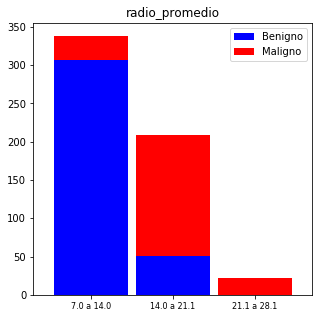

In [17]:
ax = histograma_benigno_maligno(intervalos(3),'radio_promedio',1)
plt.show()

Vemos que los radios mas pequeños representan mayores casos de cáncer. Mientras que los radios más grandes son casi todos casos malignos. Veamos si esta tendencia se mantiene al nivel de áreas y perímetros: 

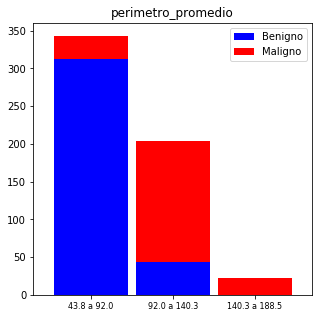

In [18]:
ax = histograma_benigno_maligno(intervalos(3),'perimetro_promedio' ,1)

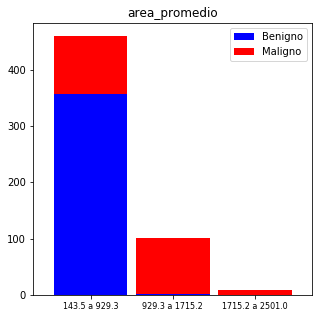

In [19]:
ax = histograma_benigno_maligno(intervalos(3),'area_promedio',1 )

Vemos que en caso del área, se agudiza más la tendencia discutida en el caso del radio:

1) La mayoría de los casos de cancer aparecen en áreas pequeñas.

2) Las áreas pequeñas representan en su mayoría casos benignos, mientras que las áreas grandes representan en su mayoría casos malignos
***


Veamos ahora que sucede con los atributos que están relacionados no con la _extension_ de  los núcleos sino con lo _características_ de la figura. Uno de estos atributos son  la dimensión fractal y la simetría:

![](images/symmetry.png)

<div style="text-align: center"> Para medir la simetría, se encuentra el eje mayor, o el acorde más largo a través del centro. Luego, medimos la diferencia de longitud entre las líneas perpendiculares al eje mayor del límite de la celda en ambas direccione. </div>

Otro atributo  es la _simetría_:

![](images/fractals.png)

<div style="text-align: center"> La dimensión fractal de una celda se aproxima utilizando la aproximación de "línea de costa" descrita por Mandelbrot. El perímetro del núcleo se mide utilizando 'reglas' cada vez más grandes. A medida que aumenta el tamaño de la regla, disminuye la precisión de la medición y disminuye el perímetro observado. Al trazar estos valores en una escala logarítmica y medir la pendiente descendente se obtiene (el negativo de) una aproximación a la dimensión fractal. Al igual que con todas las características de la forma, un valor más alto corresponde a un contorno menos regular y, por lo tanto, a una mayor probabilidad de malignidad. </div>

[_REFERENCIA_: Nuclear feature extraction for breast tumor diagnosis
W. Nick Street, W. H. Wolberg, O. L. Mangasarian, Proceedings Volume 1905, Biomedical Image Processing and Biomedical Visualization; (1993) ]



***
Hacemos histogramas para estos dos atributos:

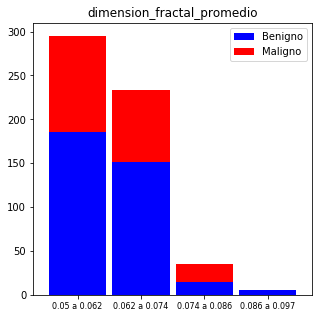

In [20]:
ax = histograma_benigno_maligno(intervalos(4),'dimension_fractal_promedio',3 )

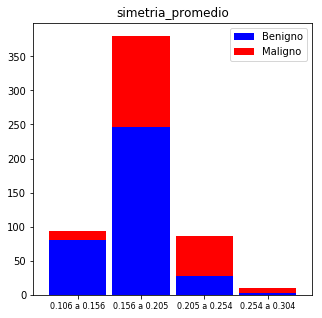

In [21]:
ax = histograma_benigno_maligno(intervalos(4),'simetria_promedio',3 )

La distribución de tamaños en intervalos iguales no influye de manera tan decisiva en el tipo de cáncer (Maligno vs Benigno) como en el caso de áreas, radios y perímetros.

### Ingeniería de Características

**Datos Categóricos** 

Los datos categóricos son variables que contienen valores de etiqueta en lugar de valores numéricos. El número de valores posibles a menudo se limita a un conjunto fijo.

Por ejemplo, los usuarios normalmente se describen por país, género, grupo de edad, etc.

De hecho ya hemos  convertido los atributos del _Diagnóstico_ a valores numéricos:
***

In [22]:
data[['Maligno','Benigno']].sample(2)

,Maligno,Benigno
402,0,1
357,0,1


Las columnas _Maligno_ y _Benigno_ son redundates. El conocimiento de una, automaticamente nos define la otra. Eliminamos una:

In [23]:
data = data.drop(columns = 'Maligno')

En este punto la columna _Diagnostico_ tambien se vuelve redundante, por lo que también la eliminamos:

In [24]:
data = data.drop(columns = 'Diagnostico')

### Ingeniería de Características

**División el conjunto de datos** 

Los datos que utilizamos generalmente se dividen en datos de entrenamiento y datos de prueba. 
El conjunto de entrenamiento contiene _un_ resultado conocido y 
el modelo aprende sobre estos datos para generalizarse a otros datos más adelante. 
Tenemos el conjunto de datos de prueba (o subconjunto) para probar la predicción de nuestro modelo 
en este subconjunto.
***
Primero, separamos el conjunto total de diagnósticos (presentado por la letra _Y_) del resto de los atributos (representados por la letra _X_)


In [25]:
X = data.iloc[:, 0:29].values
Y = data.iloc[:, 30].values

Separamos el conjunto de entrenamiento y el conjunto prueba usando la biblioteca **SciKit-Learn**. Más en especifico, el método 'train_test_split':

In [26]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

El parametro test_\__size_ representa el porcentaje de los datos _(X,Y)_  que serán usados como datos de prueba. En nuestro caso hemos usado el veinticinco porciento. El parámetro _random_\__state_ sirve para establecer la semilla del algoritmo aleatorio que selecciona los conjuntos de datos 
***
### Escalamiento de los atributos 

La mayoría de las veces, un conjunto de datos contendrá características altamente variables en su magnitudes, unidades y rango. Por ejemplo notemos la gran disparidad que existe entre las columnas 'dimension_fractal' y 'radio_promedio':

In [28]:
data[['area_promedio','dimension_fractal_promedio']].describe() 

,area_promedio,dimension_fractal_promedio
count,569.000000,569.000000
mean,654.889104,0.062798
std,351.914129,0.007060
min,143.500000,0.049960
25%,420.300000,0.057700
50%,551.100000,0.061540
75%,782.700000,0.066120
max,2501.000000,0.097440


 Asi como la cercania o lejania entre dos ciudades distintas se establece con la distancia que los separa, en estadística también tenemos el concepto de distancia entre los datos _medidos_ con los datos del _modelo teórico_. De hecho, la noción de distancia en estadística es la misma que la que hay para dos ciudades: la medida Euclideana.
 Con ella, podemos decir si nuestras predicciones del modelo están cerca o lejos de las predicciones de los datos medidos. Es un poco descabellado comparar distancias de ciudades con las distancias entre dos hormigas en un mismo hormiguero, pero los ejemplos del 'area_promedio' y 'dimension_fractal_promedio' arriba expuestos  nos  están demostrando que semejantemente nos encontramos en esta situacion.
 ***
 <div style="text-align: center">  _Es deseable llevar todas las características al mismo nivel de magnitudes. Esto se puede lograr mediante la escala. Esto significa transformar todos los datos a una misma  escala específica, 
como  de 0 a 100 o de  0 a 1._  </div>
 ***


Para ello, usamos el metodo _StandardScaler_ de la bilbioteca **sklearn**

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### Modelado de datos
 - Seleccion de Caracteristicas.  Reducir el numero de caracterisiticas trae los siguientes beneficios:
     - Reduce el numero de redundancias en los datos
     - Acelera los procesos de entrenamiento 
     - Reduce el 'overfitting'
     - Muestreo de modelos base
 - Muestreo de los modelos base   
 ***

En el area del aprendizaje de maquinas se diferencian las predicciones en dos tipos. Por un lado, las predicciones que toman valores en el  continuo (en la recta real), se les llama _Regresiones_. Por ejemplo, el tiempo que tarda un avion en cruzar el continente. Mientras que las predicciones que invulcran solo un numero finito de predicciones (discreto o categórico), se les conoce como _clasificaciones_. Por ejemplo un conjunto de tres colores, el día o la noche, etc.
***
En nuestro caso queremos predicir si el cancer es maligno o benigno, entonces usaremos _algoritmos de clasificacion para el aprendizaje supervisado_ 
***
La palabra supervisado, aqui significa que sabemos que etiqueta final queremos predecir: _Benigno_ o _Maligno_. Las etiquetas _Benigno_  y _Maligno_ que usamos para entrenar a la maquina, no deben ser llamadas  _predicciones_ sino _datos de salida_: toda prediccion es un dato de salida pero no al reves.


Los siguientes nombres de algoritmos de clasificación en Aprendizaje Automático, son de los más populares en el mundo de la ciencia de datos:

1. Regresión logística

2. Vecino más cercano

3. Soporte de máquinas de vectores

4. Kernel SVM

5. Naïve Bayes

6. Árbol de decisión

7. Bosques al azar

La biblioteca **sklearn** tiene en incluído todos estos casos. A continuación describimos cada uno de los métodos e importamos las correspondendientes sub-librerias .

##### REGRESIÓN LOGÍSTICA.

En su forma mas sencilla (la cual es la que necesitamos aqui), la regresion logistica modela las variables de salida 'Benigno y 'Maligno, en este caso hablamos de una _regresión logística binaria_.

##### Ensayo de Bernoulli

Ensayos repetidos independientes de un experimento con exactamente dos resultados posibles se llaman _ensayos de Bernoulli_ (el resultado de un paciente no influyen en los demás)


La regresión logística difiere de la regresión ordinaria en que la segunda regresa valores continuos. En la regresión logísitica, la simplicidad de la regresión lineal es usada, pero tiene que ser adicionada con  una forma de convertir una variable binaria en una continua que pueda tomar cualquier valor real (negativo o positivo). 

Necesitamos definir la _frontera de decisión_ (_boundary decision_). 

Esta predicción categórica se puede basar en las probabilidades calculadas de éxito, y las probabilidades pronosticadas por encima de un valor de corte elegido se traducen en una predicción de éxito. 


#### Funciones de Activación

Computacionalmente a veces es mejor aproximar probabilidades de valores categóricos con funciones continuas conocidas como funciones de activación.

Por ejemplo las funciones _sigmoid_ y _tanh_:

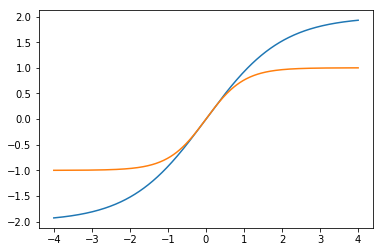

In [41]:
def sigmoid(x):  
    return  np.array([1 / (1 + np.exp(-y)) for y in x])

def tanh(x):
    return np.array([math.tanh(y) for y in x])

t = np.linspace(-4,4,400)

a = 4*sigmoid(t) - 2
b = 1*tanh(t) + 0

plt.plot(t,a,t,b)

plt.show()

A continuación cargamos el método de regresión logística de **skit-learn**, para despues hacer el ajuste:

In [42]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

#Una vez cargado el clasificador, hacemos 
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

REGRESION LOGÍSTICA 

In [ ]:

#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

#Using SVC method of svm class to use Support Vector Machine Algorithm

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

#Using SVC method of svm class to use Kernel SVM Algorithm

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

### Validación cruzada

Mucha veces en vez de dividir inicialmente el conjunto de datos en dos subconjuntos, lo hacemos en tres subconjuntos: _entrenamiento_, _validación_ y _prueba_

dejan de lado el conjunto de pruebas y eligen aleatoriamente el X% 
de su conjunto de datos de tren para que sea el conjunto de trenes real y el restante (100-X)% 
para ser el conjunto de validación, donde X es un número fijo (por ejemplo, 80%). ), 
el modelo se entrena y valida iterativamente en estos diferentes conjuntos.
Hay varias formas de hacer esto, y se conoce comúnmente como validación cruzada. 
Básicamente, utiliza su conjunto de entrenamiento para generar múltiples divisiones 
de los conjuntos de Entrenamiento y Validación. La validación cruzada evita el ajuste 
excesivo y se está volviendo cada vez más popular, siendo la Validación Cruzada K-fold 
el método más popular de validación cruzada.
Mira esto para más.

En el enfoque que estamos siguiendo (también muy común entre los practicantes del aprendizaje de datos) 


Nosotros estamos usando una forma especifica de _validacio

Nota sobre la validación cruzada: muchas veces,
las personas primero dividen su conjunto de datos en 2 - Train and Test.
Después de esto, dejan de lado el conjunto de pruebas y eligen aleatoriamente el X% 
de su conjunto de datos de tren para que sea el conjunto de trenes real y el restante (100-X)% 
para ser el conjunto de validación, donde X es un número fijo (por ejemplo, 80%). ), 
el modelo se entrena y valida iterativamente en estos diferentes conjuntos.
Hay varias formas de hacer esto, y se conoce comúnmente como validación cruzada. 
Básicamente, utiliza su conjunto de entrenamiento para generar múltiples divisiones 
de los conjuntos de Entrenamiento y Validación. La validación cruzada evita el ajuste 
excesivo y se está volviendo cada vez más popular, siendo la Validación Cruzada K-fold 
el método más popular de validación cruzada.
Mira esto para más.

Las columnas _Maligno_ y _Benigno_ son redundates. El conocimiento de una, automaticamente nos define la otra. Eliminamos una: